In [31]:
import numpy as np 
import pandas as pd 

datafile = 'moon.xlsx'
data = pd.read_excel(datafile)
data.head(20)

,Label,Stage,Luminal,Risk,Age,Menopause,MBNG,T,N,M,ER,PR,Her2,Ki67,Infiltration
0,0,2,1,2,2,0,3,2,1,0,1,1,1,1,0
1,0,1,2,2,2,0,2,1,0,0,1,1,1,2,0
2,0,2,1,2,3,0,2,1,1,0,1,1,1,1,1
3,1,3,4,3,3,1,3,2,3,0,0,0,3,2,1
4,0,2,5,2,3,1,3,2,0,0,0,0,1,2,0
5,0,2,5,3,2,0,3,1,1,0,0,0,1,2,0
6,0,3,2,3,2,0,2,4,3,0,1,0,1,2,1
7,0,1,1,1,2,0,1,1,0,0,1,1,1,1,0
8,0,2,4,3,2,0,3,1,1,0,0,0,3,2,0
9,1,3,5,3,2,0,3,3,3,0,0,0,2,2,1


In [32]:
kerasdata = pd.DataFrame()
kerasdata = pd.concat([kerasdata, data['Label']],axis = 1) 

In [33]:
for colname in data.columns:
    if colname != 'Label':
        df = pd.get_dummies(data[colname])
        df.columns = [colname + '-' + str(name) for name in df.columns ]
        kerasdata = pd.concat([kerasdata,df],axis = 1)

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
seed = 1
testsize = 0.1
kfold = StratifiedKFold(n_splits=10, random_state =seed, shuffle=True)
X, y = kerasdata.values[:,1:], kerasdata.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testsize, random_state=seed)

In [35]:
X_train.shape

(364, 42)

In [36]:
from keras import models,layers

model = models.Sequential()
model.add(layers.Dense(28,activation = 'relu',input_shape=(42,)))
model.add(layers.Dense(28,activation = 'relu' ))
# model.add(layers.Dense(30,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
# model.add(layers.Dense(10,activation = 'relu' ))
model.add(layers.Dense(1,activation = 'sigmoid' ))

# 二分类问题选择二元交叉熵损失函数
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 28)                1204      
_________________________________________________________________
dense_12 (Dense)             (None, 28)                812       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 29        
Total params: 2,045
Trainable params: 2,045
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X_train,y_train,
                    batch_size= 64,
                    epochs= 150,
                    validation_split=0.2 #分割一部分训练数据用于验证
                   )

Train on 291 samples, validate on 73 samples
Epoch 1/150
291/291 [==============================] - 0s 528us/step - loss: 0.7358 - accuracy: 0.3746 - val_loss: 0.7043 - val_accuracy: 0.5068
Epoch 2/150
291/291 [==============================] - 0s 45us/step - loss: 0.6763 - accuracy: 0.5876 - val_loss: 0.6359 - val_accuracy: 0.7671
Epoch 3/150
291/291 [==============================] - 0s 55us/step - loss: 0.6308 - accuracy: 0.7388 - val_loss: 0.5868 - val_accuracy: 0.8219
Epoch 4/150
291/291 [==============================] - 0s 55us/step - loss: 0.5969 - accuracy: 0.7595 - val_loss: 0.5493 - val_accuracy: 0.8356
Epoch 5/150
291/291 [==============================] - 0s 55us/step - loss: 0.5758 - accuracy: 0.7320 - val_loss: 0.5189 - val_accuracy: 0.8219
Epoch 6/150
291/291 [==============================] - 0s 58us/step - loss: 0.5578 - accuracy: 0.7423 - val_loss: 0.4944 - val_accuracy: 0.8219
Epoch 7/150
291/291 [==============================] - 0s 48us/step - loss: 0.5435 - accur

Epoch 57/150
291/291 [==============================] - 0s 45us/step - loss: 0.2447 - accuracy: 0.9038 - val_loss: 0.2262 - val_accuracy: 0.9178
Epoch 58/150
291/291 [==============================] - 0s 45us/step - loss: 0.2410 - accuracy: 0.9175 - val_loss: 0.2301 - val_accuracy: 0.9178
Epoch 59/150
291/291 [==============================] - 0s 31us/step - loss: 0.2367 - accuracy: 0.9175 - val_loss: 0.2292 - val_accuracy: 0.9041
Epoch 60/150
291/291 [==============================] - 0s 34us/step - loss: 0.2330 - accuracy: 0.9210 - val_loss: 0.2258 - val_accuracy: 0.9315
Epoch 61/150
291/291 [==============================] - 0s 38us/step - loss: 0.2295 - accuracy: 0.9244 - val_loss: 0.2280 - val_accuracy: 0.9315
Epoch 62/150
291/291 [==============================] - 0s 34us/step - loss: 0.2250 - accuracy: 0.9175 - val_loss: 0.2276 - val_accuracy: 0.9315
Epoch 63/150
291/291 [==============================] - 0s 31us/step - loss: 0.2212 - accuracy: 0.9210 - val_loss: 0.2278 - val_ac

Epoch 113/150
291/291 [==============================] - 0s 34us/step - loss: 0.0915 - accuracy: 0.9863 - val_loss: 0.2318 - val_accuracy: 0.9178
Epoch 114/150
291/291 [==============================] - 0s 34us/step - loss: 0.0897 - accuracy: 0.9863 - val_loss: 0.2336 - val_accuracy: 0.9178
Epoch 115/150
291/291 [==============================] - 0s 34us/step - loss: 0.0893 - accuracy: 0.9863 - val_loss: 0.2361 - val_accuracy: 0.9178
Epoch 116/150
291/291 [==============================] - 0s 27us/step - loss: 0.0874 - accuracy: 0.9863 - val_loss: 0.2369 - val_accuracy: 0.9178
Epoch 117/150
291/291 [==============================] - 0s 27us/step - loss: 0.0859 - accuracy: 0.9863 - val_loss: 0.2381 - val_accuracy: 0.9178
Epoch 118/150
291/291 [==============================] - 0s 34us/step - loss: 0.0849 - accuracy: 0.9863 - val_loss: 0.2385 - val_accuracy: 0.9178
Epoch 119/150
291/291 [==============================] - 0s 27us/step - loss: 0.0853 - accuracy: 0.9863 - val_loss: 0.2403 -

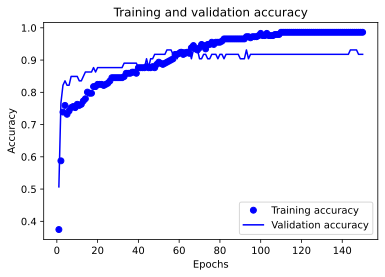

In [38]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
y_pred = model.predict_classes(X_test)

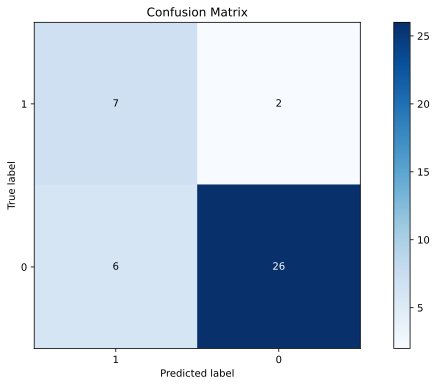

In [40]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False, labels=[1,0], figsize=(12,6));